<a href="https://colab.research.google.com/github/PBelle451/Titanic-/blob/main/Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Datasets/Titanic/train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
print(df.dtypes)

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object


In [ ]:
df = df.dropna()

In [ ]:
number = LabelEncoder()
df['Name'] = number.fit_transform(df['Name'].astype('str'))
df['Sex'] = number.fit_transform(df['Sex'].astype('str'))
df['Age'] = number.fit_transform(df['Age'].astype('str'))
print(df.dtypes)

PassengerId      int64
Survived         int64
Pclass           int64
Name             int64
Sex              int64
Age              int64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object


<ipython-input-5-2a578502b0e5>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Name'] = number.fit_transform(df['Name'].astype('str'))
<ipython-input-5-2a578502b0e5>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Sex'] = number.fit_transform(df['Sex'].astype('str'))
<ipython-input-5-2a578502b0e5>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://panda

In [ ]:
X = df[['Name', 'Sex', 'Pclass', 'Age', 'PassengerId']]
Y = df['Survived']

In [ ]:
dft = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Datasets/Titanic/test.csv')
dft.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [ ]:
print(dft.dtypes)

PassengerId      int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object


In [ ]:
dft['Name'] = number.fit_transform(dft['Name'].astype('str'))
dft['Sex'] = number.fit_transform(dft['Sex'].astype('str'))
dft['Age'] = number.fit_transform(dft['Age'].astype('str'))
print(dft.dtypes)

PassengerId      int64
Pclass           int64
Name             int64
Sex              int64
Age              int64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [ ]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [ ]:
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

In [ ]:
print(f"Predição: {y_pred}")
print(f"Acurácia: {accuracy}")
print(f"Relatório de Classificação:\n{report}")
print(f"Matriz de Confusão:\n{conf_matrix}")

Predição: [1 1 1 1 0 0 1 1 1 0 0 1 1 1 0 1 1 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1 0 1 0 1 1]
Acurácia: 0.7837837837837838
Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.80      0.57      0.67        14
           1       0.78      0.91      0.84        23

    accuracy                           0.78        37
   macro avg       0.79      0.74      0.75        37
weighted avg       0.79      0.78      0.77        37

Matriz de Confusão:
[[ 8  6]
 [ 2 21]]


In [ ]:
X_test['Survived']  = y_pred
y_pred = X_test[['PassengerId', 'Survived']]
y_pred.head()

,PassengerId,Survived
118,119,1
251,252,1
742,743,1
544,545,1
712,713,0


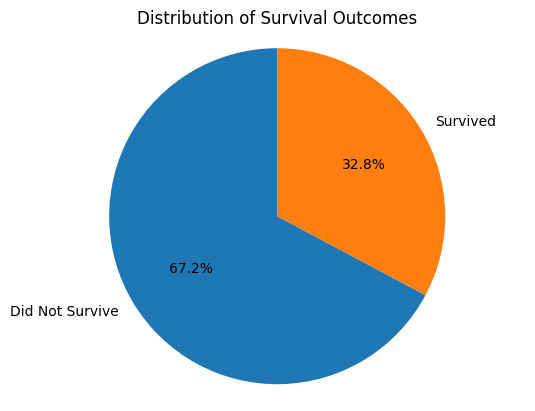

In [ ]:
# @title Distribution of Survival Outcomes

import matplotlib.pyplot as plt

outcomes = df['Survived'].value_counts()
plt.pie(outcomes, labels=['Did Not Survive', 'Survived'], autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Survival Outcomes')
_ = plt.axis('equal')

In [ ]:
y_pred.to_csv('/content/drive/MyDrive/Colab Notebooks/Datasets/Titanic/submission.csv', index='False')